# How to run:
Click the cell below, then press 'Run->Run Selected Cells' or press shift+enter.

If you see number in the brackets[], then it's down. Move on to the next cell. New cell will appear after you run the latest cell.

[\*] means it takes a while, please wait. This shouldn't happen for the first cell bellow.

If it's not working, right click, and click 'Restart Kernel'.

In [5]:
import numpy as np
import sys
import matplotlib.pyplot as plt
plt.close('all')
from matplotlib import cm
import scipy.ndimage.filters as filters
class sphere(object):
    def solve_xy(self, a, b, z=0):
        _range = np.arange(-self.range, self.range+self.res, self.res)
        x, y = np.meshgrid(_range, _range)
        c = x**2+y**2+2*a.m/(np.sqrt((x-a.x)**2+(y-a.y)**2+(z-a.z)**2))+\
            2*b.m/(np.sqrt((x-b.x)**2+(y-b.y)**2+(z-b.z)**2))
        print('2d at z=%.2f, c(normalized energy) range is (%.3f, %.3f)'%(z, np.min(c), np.max(c)))
        return x, y, c  #then c is what we saw in the class, function of energy.
    def solve_L(self, a, b, z=0):
        #solve for Lagrange points.
        _range = np.arange(-self.range, self.range+self.res, self.res)
        x, y = np.meshgrid(_range, _range)
        cx = x-a.m*(x-a.x)/(np.sqrt((x-a.x)**2+(y-a.y)**2+(z-a.z)**2))**3-\
            b.m*(x-b.x)/(np.sqrt((x-b.x)**2+(y-b.y)**2+(z-b.z)**2)**3)
        cy = y-a.m*(y-a.y)/(np.sqrt((x-a.x)**2+(y-a.y)**2+(z-a.z)**2))**3-\
            b.m*(y-b.y)/(np.sqrt((x-b.x)**2+(y-b.y)**2+(z-b.z)**2)**3)
        return cx, cy  #then find where cx=0, cy=0
    def __init__(self, x=0, y=0, z=0, m=0):
        self.x = x
        self.y = y
        self.z = z
        self.m = m
        self.range = 3
            #limitation that x and y will take.
        self.res = 0.005
            #Change this coefficient if there is no lagrange points.
            #Due to different resolution, there might be multi-points at one position.

def potential_plot(miu=0.1, z=0):
    '''
    2d potential energy plot
    '''
    O1 = sphere(x=miu, y=0, z=0, m=1-miu)
        #Here assume distance and mass of objects is normalized. 
        #Set center of mass as original of coordinates.
    O2 = sphere(x=-(1-miu), y=0, z=0, m=miu)
    if z!=0:  
        #if not at z=0, there is no lagrange point.
        print('No Lagrange points. Points on plot means stable motion in one dimension or two, not in z.')
    x, y, c = sphere().solve_xy(O1, O2, z=z)
    minima = (c==filters.minimum_filter(c, 3))  
        #Local minimum in x-y plane. Is stable Lagrange point if z=0.
    cx, cy = sphere().solve_L(O1, O2, z=z)
    ind_Lagrange = (np.abs(cx)<0.01)*(np.abs(cy)<0.01)
    minima_cy = (np.abs(cy)==filters.minimum_filter(np.abs(cy), footprint=np.ones((3, 1))))
    minima_cx = (np.abs(cx)==filters.minimum_filter(np.abs(cx), footprint=np.ones((1, 3))))
        #x(i, i0) is the same, so to find local minimum(near 0), should set footprint to search for a certain axis.
    ind_Lagrange = minima_cy*minima_cx
    fig, ax = plt.subplots(figsize=(25, 20))
    contour = ax.contourf(x, y, c, np.arange(np.min(c), 20, 0.2), cmap=cm.jet)
        #Change np.arange(np.min(c), 20, 0.2) can give you better plot resolution.
    cb = fig.colorbar(contour)
    cb.set_label('Normalized Energy', fontsize=20)
    ax.set_aspect(1)
    ax.plot([-O1.range, O1.range], [0, 0], c='black')
    ax.plot([0, 0], [-O1.range, O1.range], c='black')
    s_m = ax.scatter(O1.x, O1.y, s=500*np.sqrt(O1.m), c='magenta', marker='P')
    ax.scatter(O2.x, O2.y, s=500*np.sqrt(O2.m), c='magenta', marker='P')
    s_L = ax.scatter(x[ind_Lagrange], y[ind_Lagrange], s=100, c='g')  
        #All Lagrange points.
    s_stable = ax.scatter(x[minima], y[minima], s=200, marker='x', c='r')  
        #Only stable Lagrange points.
    
    legend = ax.legend([s_m, s_L, s_stable], ['Objects', 'All L points', 'x-y Stable'], 
                loc='upper left', prop={'size':26}, borderaxespad=0.)
    ax.add_artist(legend)
    fig.savefig('miu='+str(miu)+',z='+str(z)+'.jpg')

# Usage:
```python
potential_plot(miu=0.1, z=0)
```
If there is no sentence pop up after you run the code, restart the kernel and start over again.

2d at z=0.00, c(normalized energy) range is (2.910, 19573523905361.711)


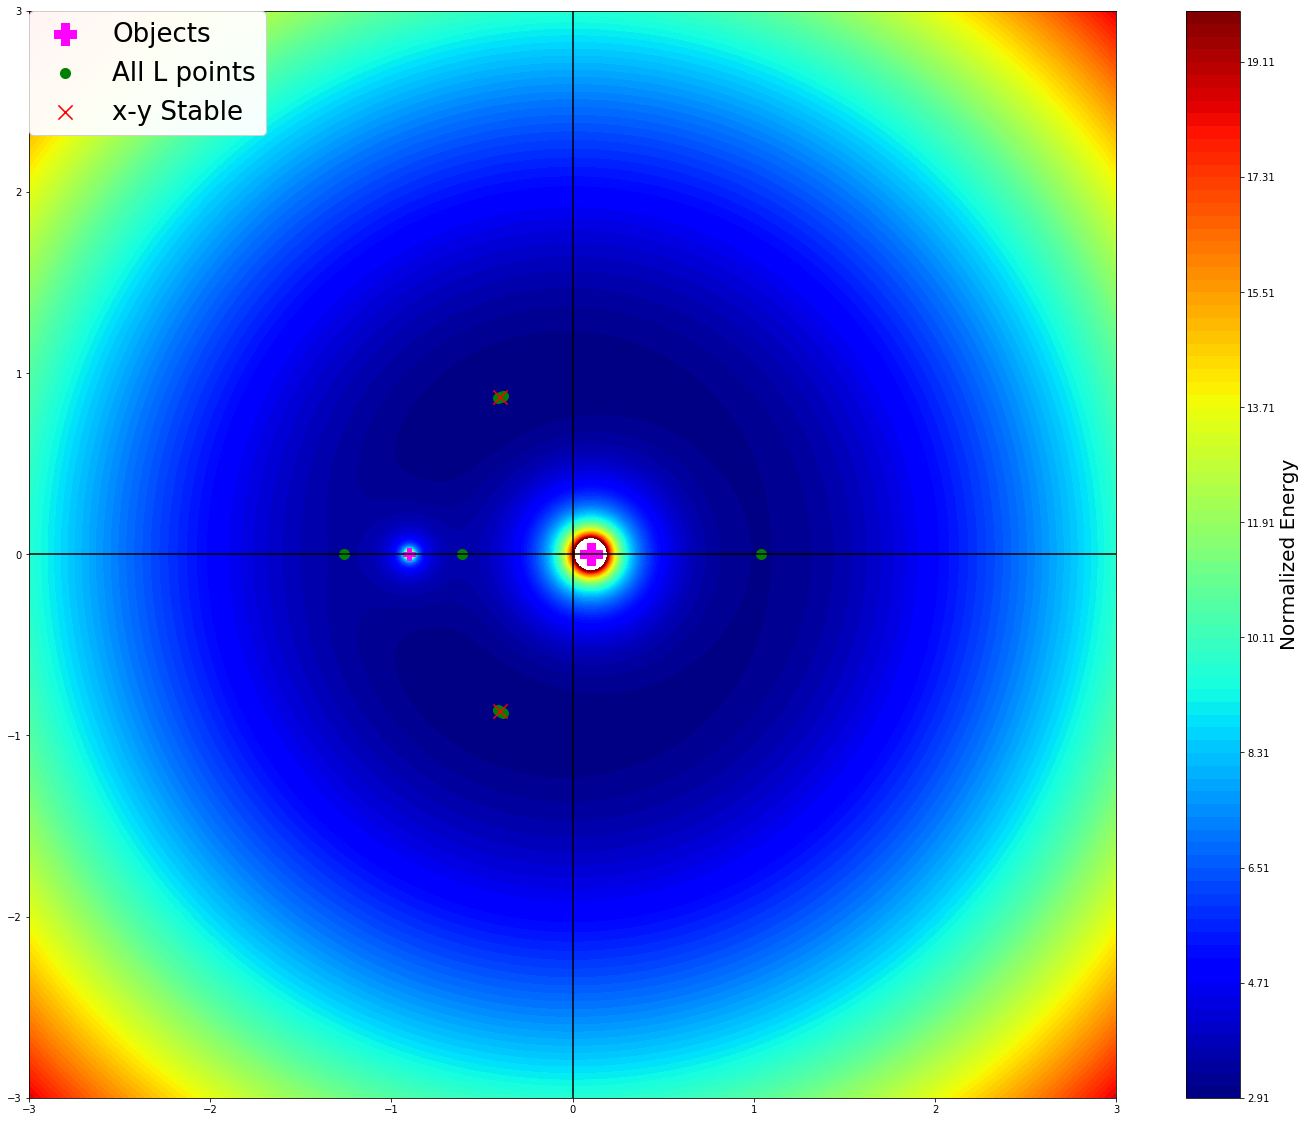

In [6]:
potential_plot(miu=0.1, z=0)

No Lagrange points. Points on plot means stable motion in one dimension or two, not in z.
2d at z=1.00, c(normalized energy) range is (1.928, 18.459)


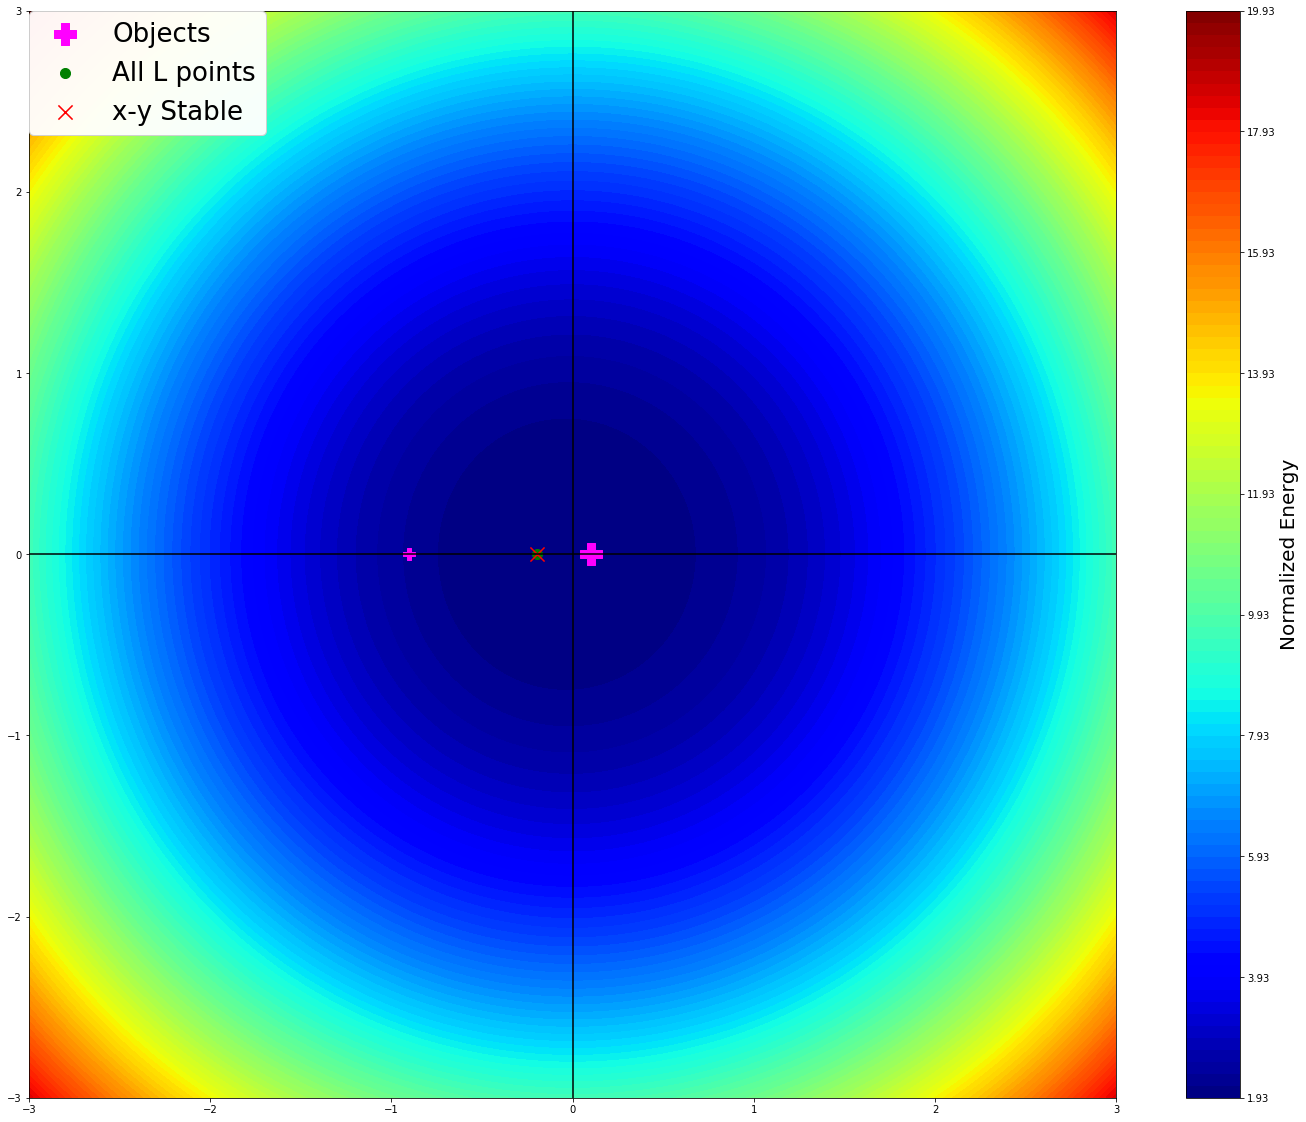

In [7]:
potential_plot(miu=0.1, z=1)